In [36]:
import numpy as np 
import pandas as pd 
import os

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [38]:
# import ipywidgets as widgets
# import io
from PIL import Image
# import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [39]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [40]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [42]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [43]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [45]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [46]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 585s 7s/step - loss: 2.7241 - accuracy: 0.2849 - val_loss: 1.3572 - val_accuracy: 0.4286
Epoch 2/10
83/83 [==============================] - 627s 8s/step - loss: 1.1606 - accuracy: 0.4960 - val_loss: 1.0001 - val_accuracy: 0.5680
Epoch 3/10
83/83 [==============================] - 620s 7s/step - loss: 0.9979 - accuracy: 0.5796 - val_loss: 0.9115 - val_accuracy: 0.6156
Epoch 4/10
83/83 [==============================] - 605s 7s/step - loss: 0.9027 - accuracy: 0.6084 - val_loss: 0.8300 - val_accuracy: 0.6293
Epoch 5/10
83/83 [==============================] - 563s 7s/step - loss: 0.7935 - accuracy: 0.6667 - val_loss: 0.8322 - val_accuracy: 0.6156
Epoch 6/10
83/83 [==============================] - 581s 7s/step - loss: 0.6794 - accuracy: 0.7227 - val_loss: 0.6483 - val_accuracy: 0.7143
Epoch 7/10
83/83 [==============================] - 578s 7s/step - loss: 0.6113 - accuracy: 0.7431 - val_loss: 0.5403 - val_accuracy: 0.7789
Epoch 8/10
83

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

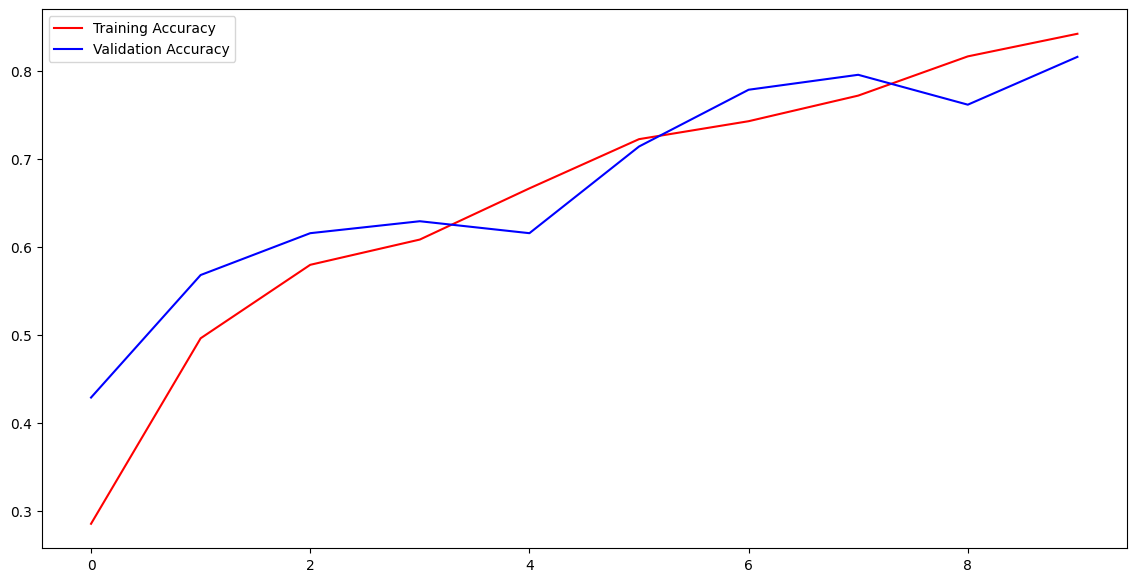

In [48]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

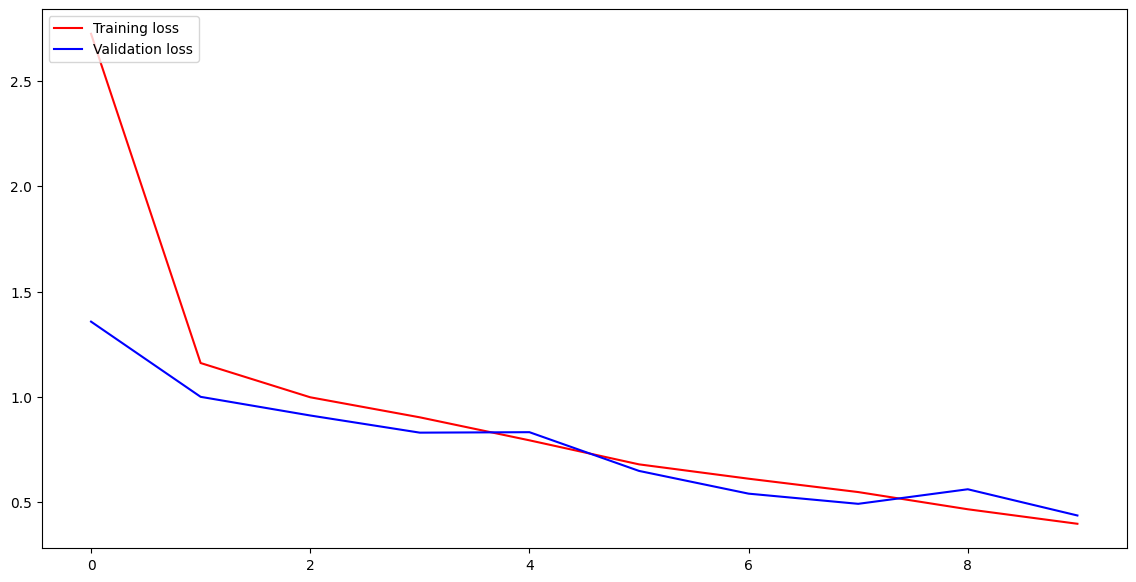

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [50]:
model.save('cnn_model.h5')

Prediction

In [51]:
img = cv2.imread('data/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [52]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

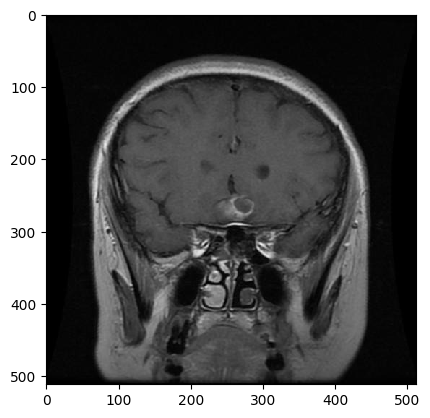

In [53]:
from tensorflow.keras.preprocessing import image
img = image.load_img('data/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [66]:
y_pred = model.predict(X_test)
y_pred

11/11 [==============================] - 19s 2s/step


array([[6.0797035e-04, 5.6910994e-03, 3.3404600e-04, 9.9336690e-01],
       [2.4238160e-02, 1.3762541e-02, 9.6119219e-01, 8.0708863e-04],
       [9.9561137e-01, 3.4093542e-03, 8.6968714e-05, 8.9229597e-04],
       ...,
       [9.9694711e-01, 2.3786863e-03, 1.1478610e-04, 5.5946410e-04],
       [4.8151502e-01, 5.0920510e-01, 8.8241221e-03, 4.5577792e-04],
       [1.7541463e-03, 2.1775795e-02, 7.8783240e-03, 9.6859175e-01]],
      dtype=float32)

In [67]:
loss , acc = model.evaluate(x = X_test , y = y_test)

11/11 [==============================] - 20s 2s/step - loss: 0.4993 - accuracy: 0.7890


In [68]:
print(f"Test Loss = {loss}")
print(f"Test Accuracy = {acc}")

Test Loss = 0.4992949366569519
Test Accuracy = 0.78899085521698
